# Otimizacão multiobjetivo

algoritmo NSGA-II: https://github.com/sahutkarsh/NSGA-II/blob/master/NSGA-II.ipynb

In [5]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
%matplotlib inline

## NSGA II

### Funções objetivo a serem otimizadas

In [10]:
ativos = pd.read_csv('OTM - Sheet7.csv')

In [11]:
ativos

,ABEV3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BPAC11,BRAP4,BRDT3,...,SUZB3,TAEE11,TIMP3,UGPA3,USIM5,VALE3,VIVT4,VVAR3,WEGE3,YDUQ3
0,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
1,15.7,22.4,11.99,30.1,18.69,18.91,30.45,17.5,17.38,16,...,20.56,19.32,11.23,25.43,6.07,26.4,47.72,7.5,10.77,26.58
2,16.07,22.96,12.95,33.48,19.92,20.43,31.15,18,18.42,16.05,...,20.14,19.35,11.25,26,6.18,27.49,48.2,7.5,10.66,26.51
3,16.13,22.99,12.95,33.28,19.93,20.71,31.21,18.2,19.14,15.95,...,19.7,19.4,11.51,25.75,6.27,28.31,48.95,7,10.58,26.83
4,15.77,22.85,12.55,32,18.99,19.58,30.54,17.95,18.99,16.35,...,20,19.38,11.36,25,6.04,28.3,49.09,6.5,10.43,26.05
5,15.55,23.91,11.8,31.16,18.33,18.89,29.74,18.75,18.06,16.6,...,20.39,19.48,11.12,24.76,5.8,26.48,48.15,5.13,10.5,26
6,16.07,23.92,12.19,31.99,19.11,19.62,30.4,19.2,18.43,16.7,...,20.6,20.2,11.75,25.9,5.8,26.62,48.6,6.8,10.43,26.59
7,15.91,23.86,11.66,30.14,18.64,19.15,29.75,18.38,18.2,16.72,...,19.8,20.15,11.28,25.25,5.76,26.35,48.13,7.36,10.38,25.59
8,15.67,24.2,10.69,28.1,17.7,18.32,29.35,18.5,18.22,16.75,...,19.52,19.18,11.49,24.65,5.67,26.72,47.74,7.38,10.62,24.62
9,15.53,24.1,10.58,27.45,17.7,18.21,29.37,18.99,18.19,17.1,...,19.35,19.41,11.43,24.94,5.82,26.76,47.55,7.7,10.58,24.75


In [9]:
for ativo in ativos:
    ativo[]

NameError: name 'end' is not defined

In [13]:
# dados da carteira de investimentos
dados_acoes = pd.read_csv()

# gerar mais dados de acordo com informações acima:
carteira = DataFrame(dados_acoes, columns=['preco_ativo', 'min_cotas', 'retorno_perc', 'risco_var'])

# gerar estimativa de retorno absoluto
carteira['preco_minimo'] = carteira.preco_ativo * carteira.min_cotas
carteira['retorno_absoluto'] = carteira.preco_minimo * carteira.retorno_perc

# ordena a carteira por menor "preco_minimo"
carteira = carteira.sort_values(by=["preco_minimo"])
print(carteira)

   preco_ativo  min_cotas  retorno_perc  risco_var  preco_minimo  \
4           10         25           1.4       5.00           250   
3           15         30           1.6       3.00           450   
2           22         50           1.5     121.20          1100   
0           19        100           1.8      20.32          1900   
1           50        150           1.2      15.34          7500   

   retorno_absoluto  
4             350.0  
3             720.0  
2            1650.0  
0            3420.0  
1            9000.0  


In [14]:
len(carteira.preco_ativo)

5

In [15]:
def solution_generator(population_size, ativos, total_budget):
    solution = []
    for i in range(0, population_size):
        # gera porcentagens aleatórias iniciais estimadas para a alocação dos ativos
        randsol = 10 * np.random.rand(len(ativos.preco_ativo), )
        raw_alocation = randsol / randsol.sum(0)

        # pega porcentagem do valor total a ser dividido e aloca de acordo com as cotas minimas
        x = np.floor((total_budget * raw_alocation) / carteira.preco_minimo)
        alocated_budget = sum(x * carteira.preco_minimo)

        # agora vamos alocar o restante "quebrado" que não pode ser alocado, devido a limitacao de cotas
        remaining_budget = total_budget - alocated_budget

        while (True):
            
            # pega aleatoriamente uma ação de maior valor minimo que o budget restante pode pagar
            available_assets = ativos[ativos['preco_minimo'] <= remaining_budget]
            if (len(available_assets) == 0):
                break
            asset = available_assets.sample()  # pega aleatoriamente uma das açoes disponiveis
            alocation_multiplier = np.floor(remaining_budget / asset.preco_minimo)
            alocation_value = alocation_multiplier * asset.preco_minimo
            x[asset.index] = x[asset.index] + alocation_multiplier
            remaining_budget = remaining_budget - alocation_value.iloc[0]

        solution.append(x)
    return solution

In [16]:
# print(solution_generator(3, carteira, 100000))

In [17]:
def retorno(x):
    # x = vetor de alocação de ativos
    return x * carteira.retorno_absoluto


def risco(x):
    return -1 * x * carteira.risco_var

In [18]:
population = 2
max_gen = 100
total_budget = 50000
solution = solution_generator(population, carteira, total_budget)
valores_retorno = [retorno(solution[i]) for i in range(0, population)]
valores_risco = [risco(solution[i]) for i in range(0, population)]


In [19]:
def alocate_remaining_budget(alocation, remaining_budget, ativos):
    while (True):
        # pega aleatoriamente uma ação de maior valor minimo que o budget restante pode pagar
        available_assets = ativos[ativos.preco_minimo <= remaining_budget]
        if (len(available_assets) == 0):
            break
        asset = available_assets.sample()  # pega aleatoriamente uma das açoes disponiveis
        alocation_multiplier = np.floor(remaining_budget / asset.preco_minimo)
        alocation_value = alocation_multiplier * asset.preco_minimo
        alocation[asset.index] = alocation[asset.index] + alocation_multiplier
        remaining_budget = remaining_budget - alocation_value.iloc[0]
    return alocation

In [21]:
x = solution[1]
print("SOL:\n\n",x)
sample_to_be_changed = x.sample()
removed_samples = np.round(random.random() * sample_to_be_changed)
x[sample_to_be_changed.index] = x[sample_to_be_changed.index] - removed_samples

print("CHANGED SOL:\n\n",x)
remaining_budget = remaining_budget + carteira.preco_minimo[sample_to_be_changed.index] * removed_samples
remaining_budget = remaining_budget.iloc[0]
print("REM BUDGT:\n\n",remaining_budget)

new_x = alocate_remaining_budget(x, remaining_budget, carteira)
print("MUTATED SOL:\n\n",new_x)


SOL:

 4    49.0
3    13.0
2     5.0
0     3.0
1     2.0
Name: preco_minimo, dtype: float64
CHANGED SOL:

 4    49.0
3    10.0
2     5.0
0     3.0
1     2.0
Name: preco_minimo, dtype: float64
REM BUDGT:

 1350.0
MUTATED SOL:

 4    54.0
3    10.0
2     5.0
0     3.0
1     2.0
Name: preco_minimo, dtype: float64


In [3]:
np.ceil(random.random() * (len(x)-1))

NameError: name 'np' is not defined

In [200]:
print(x)
print(x)


4    47.0
3    32.0
2    13.0
0     1.0
1     1.0
Name: preco_minimo, dtype: float64
4    47.0
3    13.0
2    13.0
0     1.0
1     1.0
Name: preco_minimo, dtype: float64


In [191]:
def mutation(solution):
    # a mutação irá remover algumas alocações e aleatoriamente destribuir entre as outras
    mutation_prob = random.random()
    if mutation_prob < 0.99:
        rand_index1, rand_index2 = random.sample(range(0, len(solution) - 1), 2)
        perturbation = random.random()*0.5
        if solution[rand_index1] - perturbation >= 0:
            solution[rand_index1] = solution[rand_index1] - perturbation
            solution[rand_index2] = solution[rand_index2] + perturbation
        else:
            solution[rand_index2] = solution[rand_index2] + solution[rand_index1];
            solution[rand_index1] = 0

    return solution

In [45]:
# (np.array([1,1,1])+np.array([2,2,2]))/2
x = np.array([0.1,0.1,0.1])
sum(x*acoes)

2.956

### Parameter Initialization

In [22]:
population = 25
max_gen = 501
min_value= -100
max_value= 100

### Helper Methods

In [23]:
def index_locator(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

In [24]:
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_locator(min(values),values) in list1:
            sorted_list.append(index_locator(min(values),values))
        values[index_locator(min(values),values)] = math.inf
    return sorted_list

In [25]:
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 9999999999999999
    distance[len(front) - 1] = 9999999999999999
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

### Genetic Operator Functions

In [26]:
def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)
    else:
        return mutation((a-b)/2)

In [27]:
def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob <1:
        # melhorar a mutação para uma transferencia de porcentagem
        rand_index1, rand_index2 = random.sample(range(0,len(solution)-1),2)
        aux = solution[rand_index1];
        solution[rand_index1] = solution[rand_index2];
        solution[rand_index2] = aux;
    return solution

### Algorithm

In [28]:
def non_dominated_sorting_algorithm(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)
    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)
    del front[len(front)-1]
    return front

### Final Implementation Function

In [110]:
randsol = 10*np.random.rand(3,)

solution = [randsol/randsol.sum(0) for i in range(0,2)]
print(solution)
print(solution[1])
print(np.array(3;3))

SyntaxError: invalid syntax (<ipython-input-110-e5e73d104505>, line 6)

In [146]:
def nsga2(population,max_gen,min_value,max_value):
    
    gen_no=0
#     solution=[min_value+(max_value-min_value)*random.random() for i in range(0,population)]
    solution = [];
    for i in range(0,population):
        randsol = 10*np.random.rand(3,)
        solution.append(randsol/randsol.sum(0))   
    while(gen_no<max_gen):
        valores_retorno = [retorno(solution[i])for i in range(0,population)]
        valores_risco = [risco(solution[i])for i in range(0,population)]
        non_dominated_sorted_solution = non_dominated_sorting_algorithm(valores_retorno[:],valores_risco[:])
        print(non_dominated_sorted_solution)
#         print('Best Front for Generation:',gen_no)
#         for values in non_dominated_sorted_solution[0]:
#             print(solution[values],end=" ")
#         print("\n")
        crowding_distance_values=[]
        for i in range(0,len(non_dominated_sorted_solution)):
            crowding_distance_values.append(crowding_distance(valores_retorno[:],valores_risco[:],non_dominated_sorted_solution[i][:]))
        solution2 = solution[:]
        
        while(len(solution2)!=2*population):
            a1 = random.randint(0,population-1)
            b1 = random.randint(0,population-1) 

            solution2.append(crossover(solution[a1],solution[b1]))
        valores_retorno2 = [retorno(solution2[i])for i in range(0,2*population)]
        valores_risco2 = [risco(solution2[i])for i in range(0,2*population)]
        non_dominated_sorted_solution2 = non_dominated_sorting_algorithm(valores_retorno2[:],valores_risco2[:])
        crowding_distance_values2=[]
        for i in range(0,len(non_dominated_sorted_solution2)):
            crowding_distance_values2.append(crowding_distance(valores_retorno2[:],valores_risco2[:],non_dominated_sorted_solution2[i][:]))
        new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_locator(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==population):
                    break
            if (len(new_solution) == population):
                break
        solution = [solution2[i] for i in new_solution]
        gen_no = gen_no + 1
    return [valores_retorno, valores_risco]

### Curve Plotter

In [147]:
def non_dominating_curve_plotter(valores_retorno, valores_risco):
    plt.figure(figsize=(15,8))
    retorno = valores_retorno
    risco = valores_risco
    plt.xlabel('Retorno', fontsize=15)
    plt.ylabel('Risco', fontsize=15)
    plt.scatter(retorno, risco, c='red', s=25)

### Operation

In [148]:
valores_retorno, valores_risco = nsga2(population,max_gen,min_value,max_value)

[array([0.01039048, 0.5137221 , 0.47588742]), array([0.67976145, 0.16513091, 0.15510764]), array([0.30078537, 0.63168144, 0.06753319]), array([0.53584362, 0.3649515 , 0.09920489]), array([0.37041203, 0.36584197, 0.263746  ]), array([0.46421329, 0.18810205, 0.34768465]), array([0.5590392 , 0.18632983, 0.25463097]), array([0.32193614, 0.38874726, 0.2893166 ]), array([0.50731954, 0.38306442, 0.10961604]), array([0.3386055 , 0.33638234, 0.32501216]), array([0.47853497, 0.08571438, 0.43575065]), array([0.38342652, 0.36910613, 0.24746735]), array([0.13106025, 0.4720972 , 0.39684255]), array([0.2518594 , 0.02689372, 0.72124688]), array([0.04235975, 0.73850606, 0.21913419]), array([0.31495511, 0.28828812, 0.39675677]), array([0.41553872, 0.23595883, 0.34850245]), array([0.50501265, 0.20638395, 0.2886034 ]), array([0.11664768, 0.25339382, 0.6299585 ]), array([0.32025573, 0.38095245, 0.29879182]), array([0.06708646, 0.0863522 , 0.84656135]), array([0.06937414, 0.49522257, 0.43540329]), array([0.

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19

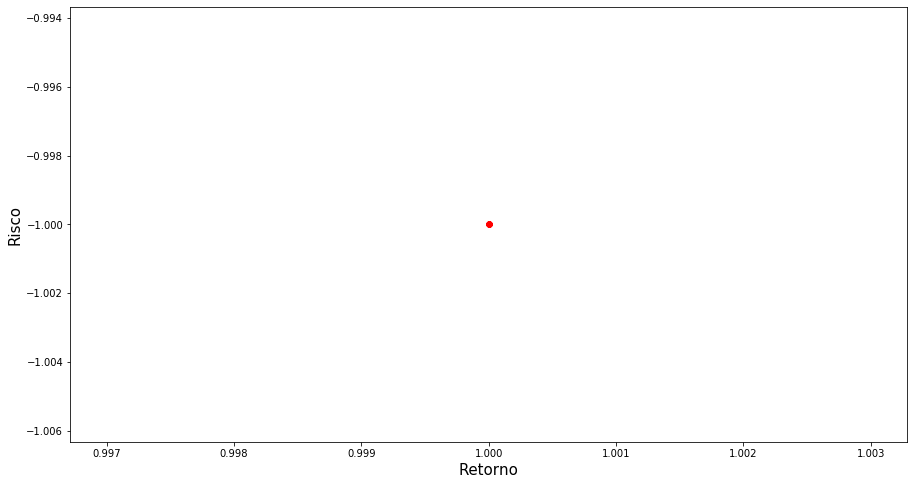

In [127]:
non_dominating_curve_plotter(valores_retorno, valores_risco)

In [18]:
print(valores_retorno)
print(valores_risco)

[-2.635301439162646e-56, -1.785879613401786e-56, -5.752680301118083e-56, 6.868332179088374e-58, 1.5713528475191833e-56, 1.7290509662135836e-56, 2.7553411461917757e-56, -8.966046833574815e-57, -1.2820680074938273e-56, -2.529674603159499e-56, 8.545486416245461e-57, 2.296333166436502e-56, -1.1098792932413825e-56, -3.203026104593468e-56, 2.573644527302834e-56, 1.9943706615900883e-56, -3.9980556974902114e-56, 0.0, 2.524366043866679e-57, 1.417507334233102e-56, -1.0131041609211962e-57, -1.2520950736074925e-56, -1.9750153020304194e-56, -5.461545507264818e-57, 4.527441764944668e-56]
[3.45958183964496e-56, 2.1860479029340066e-56, 7.261652899951742e-56, -3.507321087459915e-58, -1.8841920381268726e-56, -2.2010918939651364e-56, -3.4769009703495616e-56, 1.134350360406529e-56, 1.6355178534877736e-56, 3.2274961518192384e-56, -1.2241890457078381e-56, -2.784872908943492e-56, 1.4266500862571184e-56, 3.9145182905974297e-56, -3.0896622969275947e-56, -2.4235012745363866e-56, 4.994314736276719e-56, -0.0, -2.